In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from pmdarima import auto_arima

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
from statsmodels.tsa.statespace import sarimax

In [5]:
df=pd.read_csv('RestaurantVisitors.csv',index_col='date',parse_dates=True)

In [6]:
df

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN


In [7]:
df.index.freq='D'

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
df1=df.dropna()

In [10]:
len(df1)

478

In [11]:
results=seasonal_decompose(df1['total'])

<AxesSubplot:xlabel='date'>

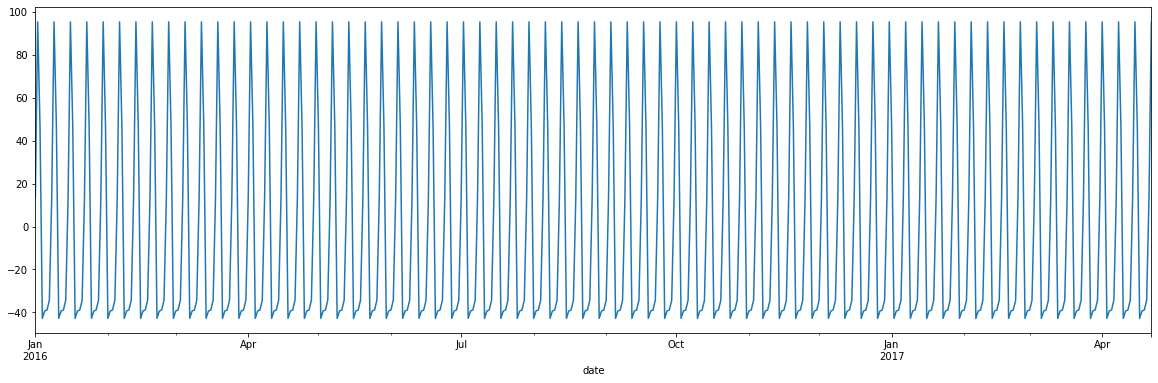

In [12]:
results.seasonal.plot(figsize=(20,6))

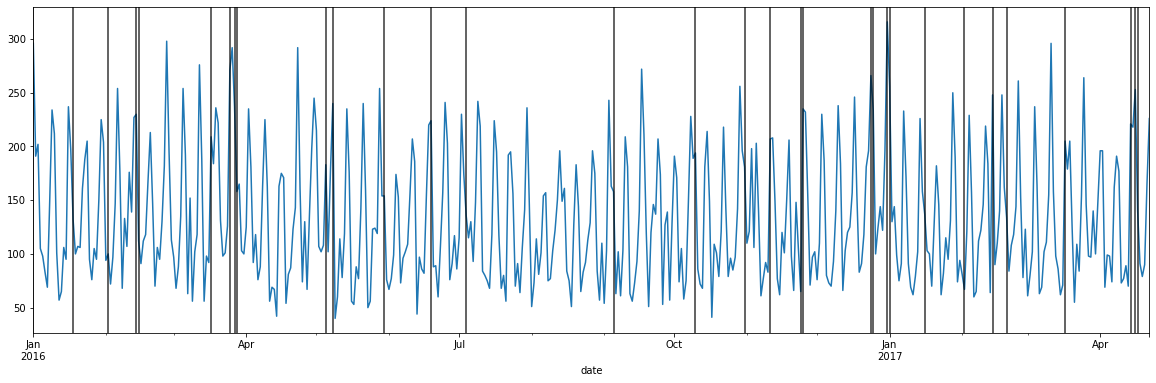

In [13]:
ax=df1['total'].plot(figsize=(20,6))

for day in df1[df1['holiday']==1].index:
    ax.axvline(x=day,color='black',alpha=0.8)

In [14]:
train=df1[:436]
test=df1[436:]

In [15]:
auto_arima(train['total'],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2168.018
Date:                   Wed, 30 Jun 2021   AIC                           4344.036
Time:                           00:01:42   BIC                           4360.347
Sample:                                0   HQIC                          4350.473
                                   - 436                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3600      1.162      2.032      0.042       0.083       4.637
ar.S.L7        0.9822      0.008    116.167      0.000       0.966       0.999
ma.S.L7       -0.8103      0.045    -17.944      0.000      -0.899      -0.722
sigma2      1196.9316     70.447     16.990      0.000    1058.858    1335.006
===================================================================================
Ljung-Box (L1) (Q):                  18.00   Jarque-Bera (JB):                70.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.78
Prob(H) (two-sided):                  0.58   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [17]:
model=SARIMAX(train['total'],order=(0,0,0),seasonal_order=(1, 0, [1], 7),enforce_invertibility=False)

In [18]:
results=model.fit()

In [19]:
pred=results.predict(start=436,end=477)

<AxesSubplot:xlabel='date'>

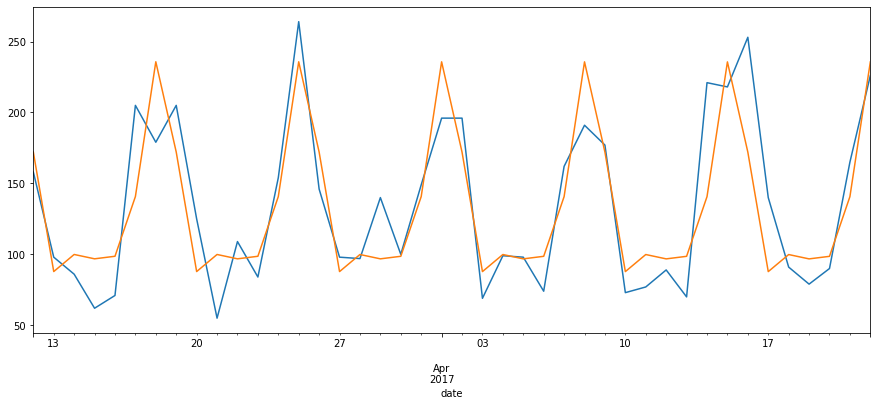

In [20]:
test['total'].plot(figsize=(15,6))
pred.plot(figsize=(15,6))

In [21]:
from statsmodels.tools.eval_measures import rmse

In [22]:
rmse(test['total'],pred)

31.912122153971662

In [45]:
auto_arima(df1['total'],exog=df1[['holiday']],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2383.417
Date:                             Wed, 30 Jun 2021   AIC                           4776.834
Time:                                     00:28:35   BIC                           4797.682
Sample:                                          0   HQIC                          4785.030
                                             - 478                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.8706      2.094      3.281      0.001       2.767      10.975
ar.L1          0.1549      0.047      3.272      0.001       0.062       0.248
ar.S.L7        0.9436      0.017     55.586      0.000       0.910       0.977
ma.S.L7       -0.6912      0.057    -12.084      0.000      -0.803      -0.579
sigma2      1308.0797     83.835     15.603      0.000    1143.766    1472.393
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                60.79
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.72
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
models=SARIMAX(train['total'],order=(1, 0, 0),seasonal_order=(1, 0, [1], 7),enforce_invertibility=False,exog=train[['holiday']])

In [47]:
results=models.fit()

In [48]:
predo=results.predict(start=436,end=477,exog=test[['holiday']])

In [49]:
rmse(predo,test['total'])

22.929742115523407

<AxesSubplot:xlabel='date'>

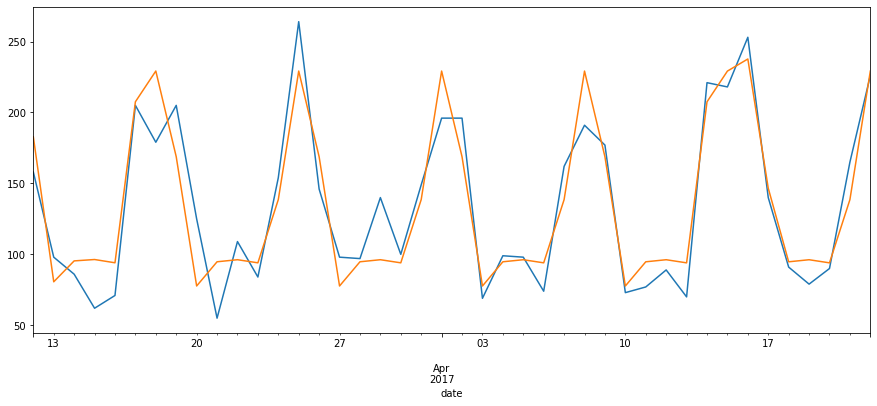

In [51]:
test['total'].plot(figsize=(15,6))
predo.plot(figsize=(15,6))

In [52]:
model=SARIMAX(df1['total'],exog=df1[['holiday']],order=(1, 0, 0),seasonal_order=(1, 0, [1], 7),enforce_invertibility=False)

In [53]:
res=model.fit()

In [54]:
exog_forecast=df[['holiday']].iloc[478:]

In [55]:
exog_forecast

,holiday
date,
2017-04-23,0
2017-04-24,0
2017-04-25,0
2017-04-26,0
2017-04-27,0
2017-04-28,0
2017-04-29,0
2017-04-30,0
2017-05-01,0


In [57]:
pr=res.predict(start=478,end=516,exog=exog_forecast)

<AxesSubplot:xlabel='date'>

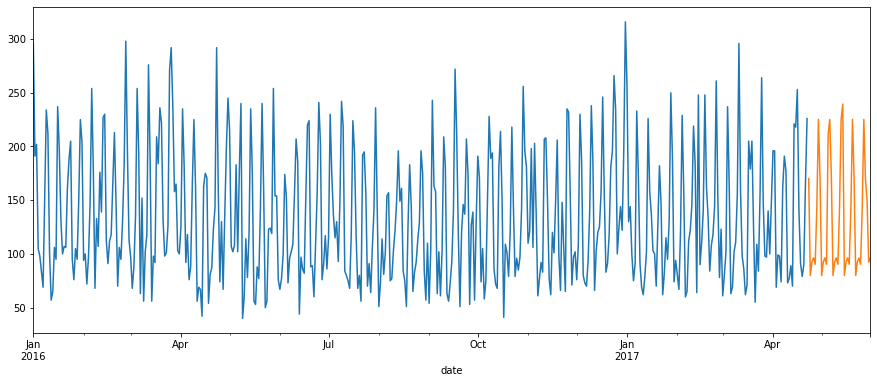

In [59]:
df['total'].plot(figsize=(15,6))
pr.plot(figsize=(15,6))

<AxesSubplot:xlabel='date'>

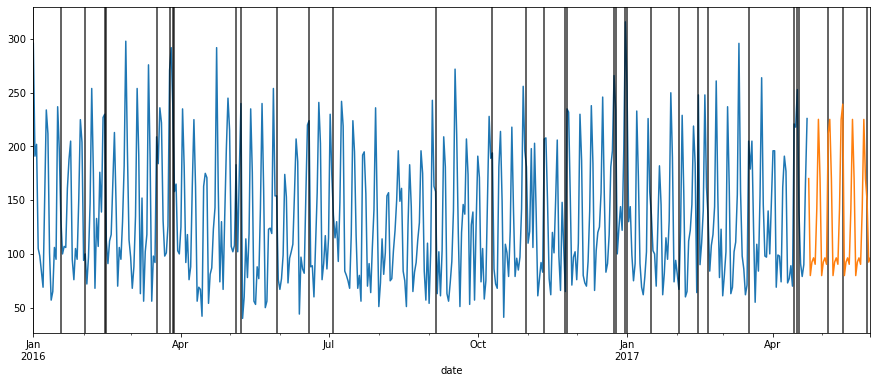

In [61]:
ax=df['total'].plot(figsize=(15,6))

for day in df[df['holiday']==1].index:
    ax.axvline(x=day,color='black',alpha=0.8)

pr.plot(figsize=(15,6))